In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
# DJE = pd.read_csv('./magazine/final/DJE_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [110]:
# DJE['ADFN_2'] = DJE['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [111]:
# DJE['ADFN_2']

### 5

In [112]:
# D5JE = pd.read_csv('./magazine/final/D5JE_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [113]:
# D5JE['ADFN_2'] = D5JE['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [114]:
# D5JE['ADFN_2']

0      [빈티지, 패션, 좋, 느, 좋, 당시, 사랑, 사랑, 나의, 물건, 새롭, 사랑,...
1      [DIOR, 론, DIOR, TALK, 예술, 문화, 사회, 아우르, 주제, 화두,...
2      [나이, DIOR, 소문, 나이키, DIOR, COLLABORATION, 드러내, ...
3      [자유, 분방, 보헤미안, 마음, 훔치, 이브, 인기, DIOR, 반, 다나, 스타...
4      [세계, 무대, 서, 코리아, 모델, 이름, 김설희, 신호탄, 런던, 밀, 리아, ...
                             ...                        
698    [서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ...
699    [내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ...
700    [한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, BLACKPINK,...
701    [BLACKPINK, 로제, 리사, 지수, 솔로, 곡, 발매, 된다, 오는, 첫, ...
702    [K, 팝, 그룹, 최초, BLACKPINK, 뚜두뚜두, DDU, DU, DDU, ...
Name: ADFN_2, Length: 703, dtype: object

### 4

In [40]:
D4JE = pd.read_csv('./magazine/final/D4JE_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [41]:
D4JE['ADFN_2'] = D4JE['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [42]:
D4JE['ADFN_2']

0      [빈티지, 패션, 좋, 느, 좋, 당시, 사랑, 사랑, 나의, 물건, 새롭, 사랑,...
1      [실크, 슬리브리스, 블랙, 와이드, 팬츠, 김, 룡, HOMME, 블랙, 부츠, ...
2            [슈트, 스니커즈, 목걸이, 팔찌, 반지, DIOR, 맨, DIOR, MEN]
3      [성희, 니트, 원피스, 베네, BOTTEGA, VENETA, 윤, 민, 니트, 엠...
4      [예쁘, 여자, 궁금해하, 곳, 세포, 라가, 한국, 상륙, 첫날, 포라, 곳곳, ...
                             ...                        
786    [서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ...
787    [내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀엽다, 포스팅, 제니, ...
788    [한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, BLACKPINK,...
789    [BLACKPINK, 로제, 리사, 지수, 솔로, 곡, 발매, 된다, 오는, 첫, ...
790    [K, 팝, 그룹, 최초, BLACKPINK, 뚜두뚜두, DDU, DU, DDU, ...
Name: ADFN_2, Length: 791, dtype: object

### top50 리스트 생성

In [43]:
top500 = pd.read_csv('./D4JE_top500.csv', sep='|', encoding = 'utf-8')

In [44]:
top500

,word,count
0,제니,9276
1,귀엽다,2241
2,예쁘다,1817
3,DIOR,1227
4,사랑,854
...,...,...
495,꿈,40
496,심플,40
497,다리,40
498,오후,40


In [45]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['제니', '귀엽다', '예쁘다', 'DIOR', '사랑', '얼굴', '패션', '무대', '노래', '매력', '옷', '잘', '아이돌', '스타일', '최고', nan, '컬렉션', '젠득', '룩', '여자', '컬러', '느낌', '팬', 'CHANEL', '실력', '영어', '눈', '드레스', '브랜드', '앞머리']


In [46]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['제니', '귀엽다', '예쁘다', 'DIOR', '사랑', '얼굴', '패션', '무대', '노래', '매력', '옷', '잘', '아이돌', '스타일', '최고', nan, '컬렉션', '젠득', '룩', '여자', '컬러', '느낌', '팬', 'CHANEL', '실력', '영어', '눈', '드레스', '브랜드', '앞머리', '예능', '랩', '모습', '춤', '블랙', '백', '티', '목소리', '분위기', '쇼', '표정', '고급', '여성', '의상', '공주', '멤버', '모델', '디자이너', '발음', '장식']


### top100

In [47]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['제니', '귀엽다', '예쁘다', 'DIOR', '사랑', '얼굴', '패션', '무대', '노래', '매력', '옷', '잘', '아이돌', '스타일', '최고', nan, '컬렉션', '젠득', '룩', '여자', '컬러', '느낌', '팬', 'CHANEL', '실력', '영어', '눈', '드레스', '브랜드', '앞머리', '예능', '랩', '모습', '춤', '블랙', '백', '티', '목소리', '분위기', '쇼', '표정', '고급', '여성', '의상', '공주', '멤버', '모델', '디자이너', '발음', '장식', '연예인', '자체', '라이브', '한국', '치마', '사랑스럽다', '포인트', '세상', '팬츠', '재킷', '입덕', '레드', '인간', '제일', '좋다', '라인', '스타', 'DESIGN', '아이템', '썸네일', '시즌', '애기', '스타일링', '연출', '레전드', '외모', '좋겠다', '화이트', '쿠마', '완성', '파리', '선택', '마음', '매치', '인기', '가수', '메이크업', '솔로', '나도', '봄', '그룹', '세계', '멋있다', '하우스', '이미지', 'MARIA', '남자', '소화', '디렉터', '웃기']


In [48]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['제니', '귀엽다', '예쁘다', 'DIOR', '사랑', '얼굴', '패션', '무대', '노래', '매력', '옷', '잘', '아이돌', '스타일', '최고', nan, '컬렉션', '젠득', '룩', '여자', '컬러', '느낌', '팬', 'CHANEL', '실력', '영어', '눈', '드레스', '브랜드', '앞머리', '예능', '랩', '모습', '춤', '블랙', '백', '티', '목소리', '분위기', '쇼', '표정', '고급', '여성', '의상', '공주', '멤버', '모델', '디자이너', '발음', '장식', '연예인', '자체', '라이브', '한국', '치마', '사랑스럽다', '포인트', '세상', '팬츠', '재킷', '입덕', '레드', '인간', '제일', '좋다', '라인', '스타', 'DESIGN', '아이템', '썸네일', '시즌', '애기', '스타일링', '연출', '레전드', '외모', '좋겠다', '화이트', '쿠마', '완성', '파리', '선택', '마음', '매치', '인기', '가수', '메이크업', '솔로', '나도', '봄', '그룹', '세계', '멋있다', '하우스', '이미지', 'MARIA', '남자', '소화', '디렉터', '웃기', '탑', '대', '코디', '착용', 'YG', '데뷔', '스커트', '한번', '제발', '활동', '고양이', '많은', '공개', '패턴', '진', '몸매', '가장', '데님', '미쳤다', '블링크', '누가', '소재', '시크', '미국', '톱', '아티스트', '곱창', '사실', '영화', '입술', '한편', '영감', '까', '타팬', '살', '관심', '손', '볼', '심장', '앤', '티셔츠', '컴백', '성격', '마지막', '순간', '작품', '핑크', 'LADY', '보러', '울', '하이틴', '밴드', 'CHRISTIAN', '젠', '니트', '하루', '소리', '검색', '걸그룹', '

In [49]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['제니', '귀엽다', '예쁘다', 'DIOR', '사랑', '얼굴', '패션', '무대', '노래', '매력', '옷', '잘', '아이돌', '스타일', '최고', nan, '컬렉션', '젠득', '룩', '여자', '컬러', '느낌', '팬', 'CHANEL', '실력', '영어', '눈', '드레스', '브랜드', '앞머리', '예능', '랩', '모습', '춤', '블랙', '백', '티', '목소리', '분위기', '쇼', '표정', '고급', '여성', '의상', '공주', '멤버', '모델', '디자이너', '발음', '장식', '연예인', '자체', '라이브', '한국', '치마', '사랑스럽다', '포인트', '세상', '팬츠', '재킷', '입덕', '레드', '인간', '제일', '좋다', '라인', '스타', 'DESIGN', '아이템', '썸네일', '시즌', '애기', '스타일링', '연출', '레전드', '외모', '좋겠다', '화이트', '쿠마', '완성', '파리', '선택', '마음', '매치', '인기', '가수', '메이크업', '솔로', '나도', '봄', '그룹', '세계', '멋있다', '하우스', '이미지', 'MARIA', '남자', '소화', '디렉터', '웃기', '탑', '대', '코디', '착용', 'YG', '데뷔', '스커트', '한번', '제발', '활동', '고양이', '많은', '공개', '패턴', '진', '몸매', '가장', '데님', '미쳤다', '블링크', '누가', '소재', '시크', '미국', '톱', '아티스트', '곱창', '사실', '영화', '입술', '한편', '영감', '까', '타팬', '살', '관심', '손', '볼', '심장', '앤', '티셔츠', '컴백', '성격', '마지막', '순간', '작품', '핑크', 'LADY', '보러', '울', '하이틴', '밴드', 'CHRISTIAN', '젠', '니트', '하루', '소리', '검색', '걸그룹', '

In [50]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['제니', '귀엽다', '예쁘다', 'DIOR', '사랑', '얼굴', '패션', '무대', '노래', '매력', '옷', '잘', '아이돌', '스타일', '최고', nan, '컬렉션', '젠득', '룩', '여자', '컬러', '느낌', '팬', 'CHANEL', '실력', '영어', '눈', '드레스', '브랜드', '앞머리', '예능', '랩', '모습', '춤', '블랙', '백', '티', '목소리', '분위기', '쇼', '표정', '고급', '여성', '의상', '공주', '멤버', '모델', '디자이너', '발음', '장식', '연예인', '자체', '라이브', '한국', '치마', '사랑스럽다', '포인트', '세상', '팬츠', '재킷', '입덕', '레드', '인간', '제일', '좋다', '라인', '스타', 'DESIGN', '아이템', '썸네일', '시즌', '애기', '스타일링', '연출', '레전드', '외모', '좋겠다', '화이트', '쿠마', '완성', '파리', '선택', '마음', '매치', '인기', '가수', '메이크업', '솔로', '나도', '봄', '그룹']


### top50만 남기기

In [51]:
len(D4JE)

791

In [52]:
top30_word = []
for i in range(len(D4JE)):
    w=[]
    for word in D4JE.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [53]:
top50_word = []
for i in range(len(D4JE)):
    w=[]
    for word in D4JE.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [54]:
top100_word = []
for i in range(len(D4JE)):
    w=[]
    for word in D4JE.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [55]:
top200_word = []
for i in range(len(D4JE)):
    w=[]
    for word in D4JE.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [56]:
top300_word = []
for i in range(len(D4JE)):
    w=[]
    for word in D4JE.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [57]:
top500_word = []
for i in range(len(D4JE)):
    w=[]
    for word in D4JE.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [58]:
D4JE

,magazine,brand,title,word,ADFN,ADFN_2
0,A,D,빈티지 쇼핑의 시대,"['그러니 빈티지 패션은, 어쩌면 나도 좋고 너도 좋은 일이다. 당시 사랑했던, 지...","['빈티지', '패션', '좋', '느', '좋', '당시', '사랑', '사랑',...","[빈티지, 패션, 좋, 느, 좋, 당시, 사랑, 사랑, 나의, 물건, 새롭, 사랑,..."
1,A,D,DON’T CATEGORIZE ME / 유태오,['실크 슬리브리스와 블랙 와이드 팬츠는 김서룡 옴므. 블랙 부츠는 보테가 베네타....,"['실크', '슬리브리스', '블랙', '와이드', '팬츠', '김', '룡', '...","[실크, 슬리브리스, 블랙, 와이드, 팬츠, 김, 룡, HOMME, 블랙, 부츠, ..."
2,A,D,"SOMETHING GOOD / 최강희, 이상엽","['슈트와 스니커즈, 목걸이, 팔찌, 반지 모두 디올 맨(Dior Men).']","['슈트', '스니커즈', '목걸이', '팔찌', '반지', 'DIOR', '맨',...","[슈트, 스니커즈, 목걸이, 팔찌, 반지, DIOR, 맨, DIOR, MEN]"
3,A,D,"다른 세계에서 / 고성희, 윤현민",['고성희가 입은 니트 원피스는 보테가 베네타(Bottega Veneta). 윤현민...,"['성희', '니트', '원피스', '베네', 'BOTTEGA', 'VENETA',...","[성희, 니트, 원피스, 베네, BOTTEGA, VENETA, 윤, 민, 니트, 엠..."
4,A,D,10CM 코앞에서 본 실물 실화? 에디터가 직접 만나 폰카로 찍은 셀럽 근접샷 베스트는?,"[""예뻐지고 싶은 모든 여자들이 궁금해하는 곳이죠! 세포라가 드디어 한국에 상륙했어...","['예쁘', '여자', '궁금해하', '곳', '세포', '라가', '한국', '상...","[예쁘, 여자, 궁금해하, 곳, 세포, 라가, 한국, 상륙, 첫날, 포라, 곳곳, ..."
...,...,...,...,...,...,...
786,W,Je,"블랙핑크X세레나 고메즈 영상통화, 협업 티징","서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...","['서로', '팬임', '인증', '두', '스타', 'BLACKPINK', '세레...","[서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ..."
787,W,Je,블랙핑크가 아이스크림 셀카를 올린 이유는?,"내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...","['내셔널', '아이스크림', '데이', '기념', 'BLACKPINK', '귀여운...","[내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀엽다, 포스팅, 제니, ..."
788,W,Je,블랙핑크 컴백! 남다른 패션 스타일링,"한국 신진 디자이너부터 하이 패션 브랜드까지 섭렵한 블핑, 6월 26일 드디어 BL...","['한국', '신진', '디자이너', '하이', '패션', '브랜드', '섭렵', ...","[한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, BLACKPINK,..."
789,W,Je,"블랙핑크 로제, 리사, 지수 솔로곡 공개한다","BLACKPINK 로제, 리사, 지수의 솔로곡이 발매된다., , 오는 9월 첫 정규...","['BLACKPINK', '로제', '리사', '지수', '솔로', '곡', '발매...","[BLACKPINK, 로제, 리사, 지수, 솔로, 곡, 발매, 된다, 오는, 첫, ..."


### item 남기기

In [59]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [60]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [61]:
# top100_not_item_word = []
# for i in range(len(tot_je)):
#     w=[]
#     for word in tot_je.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [62]:
# len(top100_not_item_word)

In [63]:
# top100_not_item_word[1]

In [64]:
# top50_word

In [65]:
len(top50_word)

791

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [66]:
# 어프라이어리(Apriori)
from apyori import apriori

In [67]:
top30_word[0]

['패션', '사랑', '사랑', '사랑', '패션', '옷', '컬렉션', 'DIOR']

In [77]:
###### 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.1))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
41,"(DIOR, 컬렉션)",0.170670,"[((), (DIOR, 컬렉션), 0.1706700379266751, 1.0), (...",2
42,"(DIOR, 패션)",0.164349,"[((), (DIOR, 패션), 0.16434892541087232, 1.0), (...",2
46,"(스타일, 제니)",0.140329,"[((), (스타일, 제니), 0.14032869785082175, 1.0), ((...",2
47,"(패션, 제니)",0.134008,"[((), (패션, 제니), 0.13400758533501897, 1.0), ((제...",2
39,"(DIOR, 브랜드)",0.126422,"[((), (DIOR, 브랜드), 0.1264222503160556, 1.0), (...",2
44,"(매력, 제니)",0.117573,"[((), (매력, 제니), 0.11757269279393173, 1.0), ((매...",2
37,"(드레스, DIOR)",0.116308,"[((), (드레스, DIOR), 0.11630847029077118, 1.0), ...",2
38,"(룩, DIOR)",0.112516,"[((), (룩, DIOR), 0.1125158027812895, 1.0), ((D...",2
36,"(CHANEL, 제니)",0.111252,"[((), (CHANEL, 제니), 0.11125158027812895, 1.0),...",2
43,"(룩, 제니)",0.106195,"[((), (룩, 제니), 0.10619469026548672, 1.0), ((룩)...",2


In [78]:
idx = []
for i in df.index:
    if '제니' in df.loc[i, 'items']:
        idx.append(i)

In [79]:
df.loc[idx]

,items,support,ordered_statistics,length
46,"(스타일, 제니)",0.140329,"[((), (스타일, 제니), 0.14032869785082175, 1.0), ((...",2
47,"(패션, 제니)",0.134008,"[((), (패션, 제니), 0.13400758533501897, 1.0), ((제...",2
44,"(매력, 제니)",0.117573,"[((), (매력, 제니), 0.11757269279393173, 1.0), ((매...",2
36,"(CHANEL, 제니)",0.111252,"[((), (CHANEL, 제니), 0.11125158027812895, 1.0),...",2
43,"(룩, 제니)",0.106195,"[((), (룩, 제니), 0.10619469026548672, 1.0), ((룩)...",2


In [80]:
jenny_items = df.loc[idx, 'items']

In [81]:
for word in jenny_items:
    for item in word:
        print(item)

스타일
제니
패션
제니
매력
제니
CHANEL
제니
룩
제니


### networkx 그래프 정의

In [82]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [83]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [84]:
pos = nx.spring_layout(G)

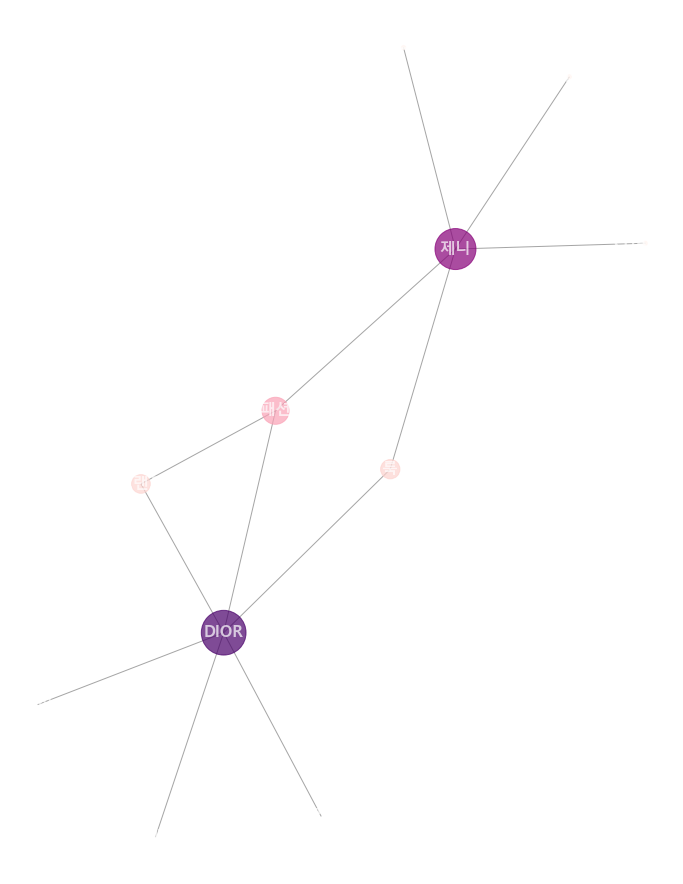

In [85]:
plt.figure(figsize = (12, 16)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.RdPu,
                font_color = 'white', font_weight = 'bold')

plt.savefig('./final_img/nt_D4JE_top500_mins1.png', bbox_inches = 'tight', transparent = True)
plt.show()
